In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

import seaborn as sns
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

2025-03-02 22:18:25.781295: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-02 22:18:25.785031: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-02 22:18:25.793770: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740953905.807539      81 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740953905.811657      81 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-02 22:18:25.828340: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

# Read the data

* These training data are from the same ant dataset we used for support vector machines.
* The response/label/Y variable is species.
* The features are morphological measurements from the ants.

In [2]:
# load ants dataset
dataframe = pd.read_csv('all_measurments2020x09.csv')

# replace species names with zeros and ones
dataframe['species'] = dataframe['species'].replace('zeteki', 0)
dataframe['species'] = dataframe['species'].replace('fovouros', 1)

# get X and Y 
Y = dataframe['species']
X = dataframe.drop(['species','caste', 'country', 'comment', 'bc_num', 'coll_code'], axis=1)

# view data
dataframe.head()

/tmp/ipykernel_81/986469058.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataframe['species'] = dataframe['species'].replace('fovouros', 1)


,bc_num,coll_code,HW,HL,SL,EL,FL,ML,PL,PPL,...,CI,EI,SI,FLI,WL,TL,caste,species,country,comment
0,Weber4_TYPE,WEBER_TYPE,1.436,1.155,1.183,0.264,0.901,2.056,0.479,0.310,...,124.3290,22.8571,82.3816,62.7437,0.789,5.267,worker,0,Panama,[Type] [Barro Colo. I C.Z. 3441 NAWeber] [Trac...
1,WEBER1_PARA,WEBER_1,1.550,1.216,1.231,0.274,0.912,2.127,0.456,0.319,...,127.4671,22.5329,79.4194,58.8387,0.775,5.486,worker,0,Panama,[Barro Colo. I. Canal Zone No856 NAWeber 1938 ...
2,WEBER2_PARA,WEBER_2,1.550,1.216,1.276,0.274,0.912,2.188,0.425,0.304,...,127.4671,22.5329,82.3226,58.8387,0.729,5.379,worker,0,Panama,TOP of 2 specimen on pin[Barro Colo. I. Canal ...
3,WEBER2.1_PARA,WEBER_2.1,1.520,1.246,1.246,0.274,0.912,2.127,0.456,0.304,...,121.9904,21.9904,81.9737,60.0000,0.760,5.440,worker,0,Panama,BOTTOM of 2 specimen on pin[Barro Colo. I. Can...
4,Weber3_PARA,WEBER_3,1.459,1.185,1.155,0.213,0.881,1.915,0.486,0.304,...,123.1224,17.9747,79.1638,60.3838,0.790,5.136,worker,0,Panama,[Barro Colorado. CANAL ZONE No. 756 N.A.Weber ...


# Prepare training, testing, and validation datasets.
* We will use *training data* to train the neural network.
* We will use *validation data* to evaluate our model while tuning hyperparameters.
* We will use *test data* to obtain an unbiased measure of error for our final model.

In [4]:
# Split the dataset into training, testing, and validation sets
# NOTE: DO NOT CHANGE THESE RANDOM_STATE VARIABLES
X_train, X_test_val, y_train, y_test_val= train_test_split(X, Y, test_size=0.3, random_state=1234)
X_test, X_val, y_test, y_val = train_test_split(X, Y, test_size=0.5, random_state=1234)

# Standardize the features (optional but recommended for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Build the model in Keras

Next, we need to define, fit, and evaluate our model. Below, I have set up a simple model. First, fit this model, and evaluate the model on the training and test datasets. 

In the word document, I ask several questions about the results of changing different aspects of the network. Using these questions as a guide, change the following things and evaluate the accuracy of the model.

**CHANGE**:

* the number of hidden layers in the network
* the number of neurons in hidden layers
* the activation function used in the hidden layers

/srv/conda/envs/notebook/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-02 22:20:58.866285: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 511 (2.00 KB)

 Trainable params: 511 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.2500 - loss: 0.8495 - val_accuracy: 0.2741 - val_loss: 0.7942
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2770 - loss: 0.7869 - val_accuracy: 0.2963 - val_loss: 0.7250
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.3661 - loss: 0.7053 - val_accuracy: 0.5037 - val_loss: 0.6674
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6108 - loss: 0.6386 - val_accuracy: 0.7185 - val_loss: 0.6198
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8004 - loss: 0.5765 - val_accuracy: 0.8222 - val_loss: 0.5789
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8739 - loss: 0.5481 - val_accuracy: 0.8222 - val_loss: 0.5430
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9076 - loss: 0.5021 - val_accuracy: 0.8370 - val_loss: 0.5104
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8975 - loss: 0.4708 - val_accuracy: 0.8444 - val_loss: 0.

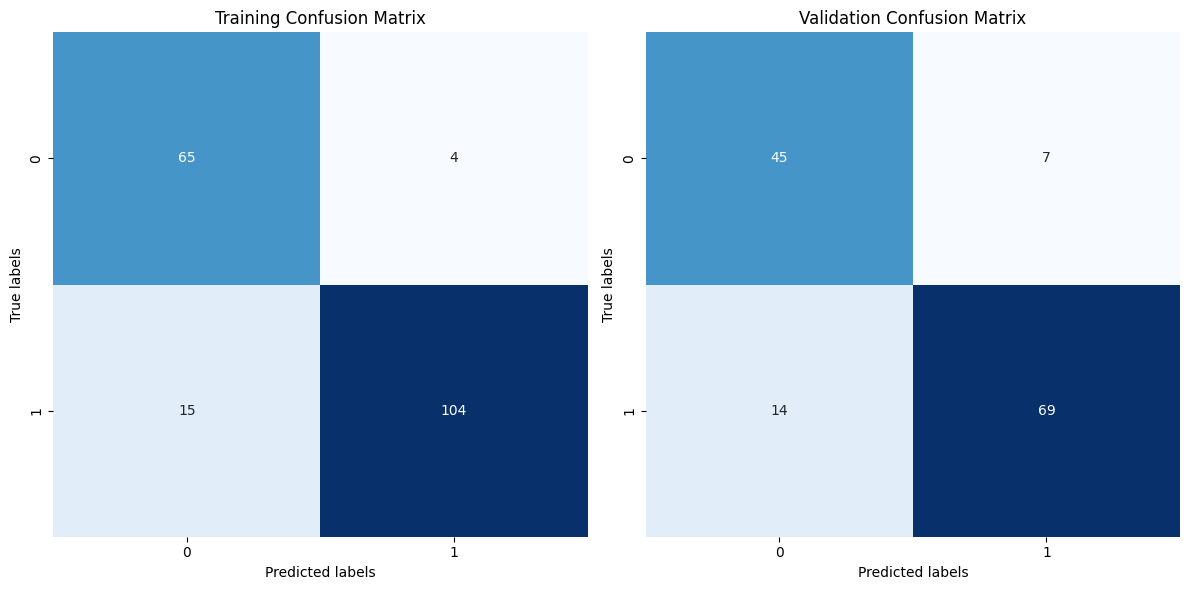

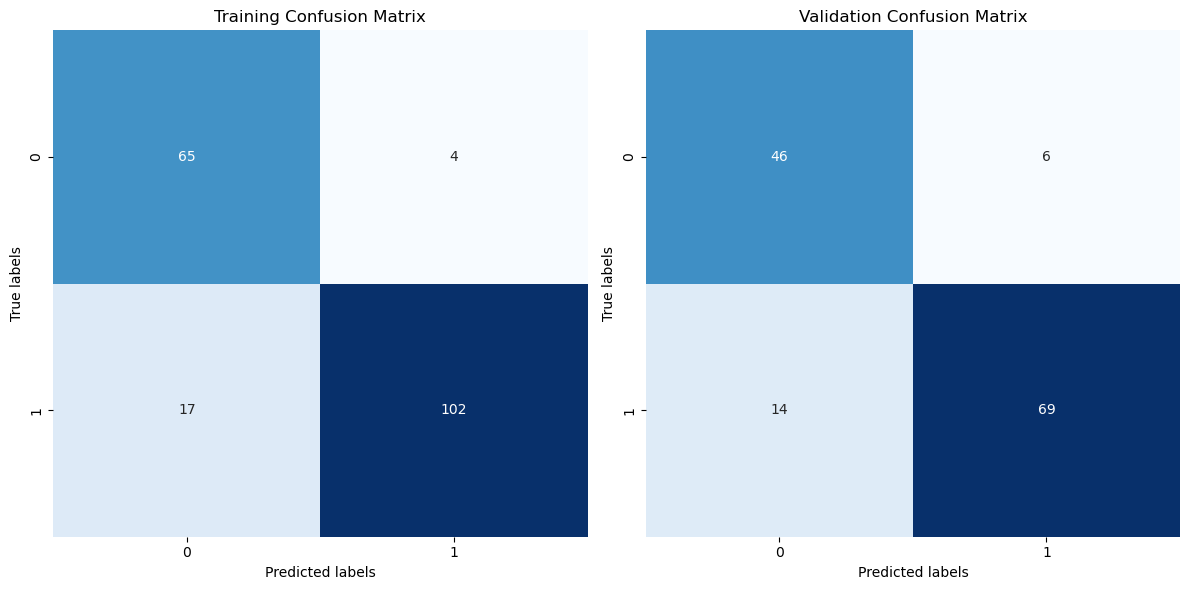

In [5]:
# build model
model = keras.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=(X_train.shape[1],)), # add a hidden layer with 30 neurons and ReLU activation 
    keras.layers.Dense(1, activation='sigmoid') # THIS IS THE OUTPUT LAYER
])

print(model.summary())

# Compile the model with a specific learning rate
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_val_scaled, y_val))

# Predictions on training and validation data
y_train_probs = model.predict(X_train_scaled)
y_val_probs = model.predict(X_val_scaled)

# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
y_train_pred = (y_train_probs > 0.5).astype(int)
y_val_pred = (y_val_probs > 0.5).astype(int)

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_val = confusion_matrix(y_val, y_val_pred)

# Plot confusion matrices side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Training Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Validation Confusion Matrix')

plt.tight_layout()
plt.show()

# Evaluate your final model on the test dataset

**ADD**: Code to evaluate the model you think is most appropriate.

**HINT**: Copy, paste, and modify the code for making predictions, coverting probabilities to binary predictions, computing confusion matrices, and plotting confusion matrices. You will need to change the datasets that are used.